In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('spam.csv')

In [4]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [5]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
subset=df.loc[:,'word_freq_make':'capital_run_length_total']

In [8]:
df1=subset

In [9]:
df1

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [10]:
x=df1

In [11]:
x


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


In [12]:
y=df.iloc[:,57:].values

In [13]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y.ravel(),test_size=0.2,random_state=0)

In [16]:

x_train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
36,0.00,0.00,0.00,0.0,2.94,0.00,0.00,0.00,0.00,0.00,...,0.00,0.436,0.436,0.000,0.873,0.000,0.000,4.142,12,29
706,0.00,0.00,0.00,0.0,0.84,1.27,0.42,0.00,0.00,0.42,...,0.00,0.097,0.097,1.171,0.244,0.390,0.000,26.405,363,977
1559,0.32,0.00,0.80,0.0,0.80,0.32,0.16,0.00,0.64,0.00,...,0.00,0.000,0.050,0.000,0.050,0.075,0.000,1.419,15,159
1349,0.18,0.00,0.09,0.0,0.36,0.09,0.00,0.36,0.09,0.00,...,0.00,0.000,0.059,0.029,0.029,0.014,0.000,4.192,48,566
3878,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.13,0.00,...,0.00,0.125,0.438,0.146,0.000,0.000,0.000,3.657,35,534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.17,0.00,0.17,0.0,1.52,0.35,0.05,0.05,0.05,0.05,...,0.00,0.010,0.052,0.000,0.010,0.167,0.000,1.818,13,462
3264,0.00,0.33,0.00,0.0,0.33,0.00,0.00,0.00,0.00,0.00,...,0.33,0.000,0.088,0.000,0.000,0.000,0.000,1.870,15,116
1653,0.43,0.40,0.37,0.0,0.15,0.09,0.06,0.12,0.50,0.97,...,0.00,0.031,0.122,0.010,0.345,0.420,0.266,8.016,178,3303
2607,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.222,0.055,0.000,0.000,0.000,1.506,12,119


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st=StandardScaler()


In [19]:
x_train=st.fit_transform(x_train)

In [20]:
x_test=st.fit_transform(x_test)


In [21]:
x_train


array([[-0.33867528, -0.16228764, -0.55479976, ..., -0.02039581,
        -0.18903029, -0.41333711],
       [-0.33867528, -0.16228764, -0.55479976, ...,  0.80640496,
         1.54708065,  1.14523468],
       [ 0.7096753 , -0.16228764,  1.07348306, ..., -0.12152228,
        -0.17419173, -0.19960891],
       ...,
       [ 1.07004581,  0.18587875,  0.19828104, ...,  0.12347636,
         0.63203642,  4.96932537],
       [-0.33867528, -0.16228764, -0.55479976, ..., -0.11829128,
        -0.18903029, -0.26537144],
       [-0.33867528, -0.16228764, -0.55479976, ..., -0.10737275,
        -0.22365358, -0.44621837]])

In [22]:
y_train

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [24]:
error=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error.append(np.mean(pred_i!=y_test))




In [25]:
import matplotlib.pyplot as plt

Minimum error  0.08577633007600434 at k=  7


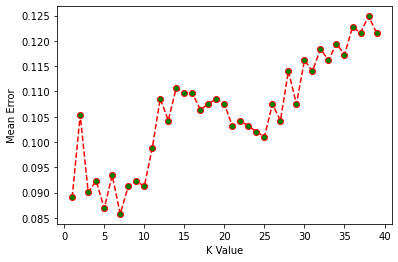

In [26]:
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='green')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error ",min(error),"at k= ",error.index(min(error))+1)

In [27]:
error

[0.08903365906623235,
 0.10532030401737243,
 0.09011943539630836,
 0.09229098805646037,
 0.08686210640608034,
 0.09337676438653637,
 0.08577633007600434,
 0.09120521172638436,
 0.09229098805646037,
 0.09120521172638436,
 0.0988056460369164,
 0.10857763300760044,
 0.10423452768729642,
 0.11074918566775244,
 0.10966340933767643,
 0.10966340933767643,
 0.10640608034744843,
 0.10749185667752444,
 0.10857763300760044,
 0.10749185667752444,
 0.10314875135722042,
 0.10423452768729642,
 0.10314875135722042,
 0.10206297502714441,
 0.10097719869706841,
 0.10749185667752444,
 0.10423452768729642,
 0.11400651465798045,
 0.10749185667752444,
 0.11617806731813246,
 0.11400651465798045,
 0.11834961997828447,
 0.11617806731813246,
 0.11943539630836048,
 0.11726384364820847,
 0.12269272529858849,
 0.12160694896851248,
 0.1248642779587405,
 0.12160694896851248]

In [30]:
classifier=KNeighborsClassifier(n_neighbors=7)

In [31]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
y_pred=classifier.predict(x_test)

In [33]:
y_pred


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test,y_pred)


array([[518,  20],
       [ 59, 324]], dtype=int64)

In [36]:
from sklearn import metrics

In [38]:
print("\nAccuracy Of KNN For The Given Dataset : ",metrics.accuracy_score(y_test,y_pred))


Accuracy Of KNN For The Given Dataset :  0.9142236699239956
